<a href="https://colab.research.google.com/github/AnshulJagotra/-Java-leetcode-solutions/blob/main/Beyond_Boundaries_IPL_Data_Analytics_%26_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# Load datasets
# =============================
matches = pd.read_csv("/content/matches.csv")      # Match-level data
deliveries = pd.read_csv("/content/deliveries.csv")  # Ball-by-ball data




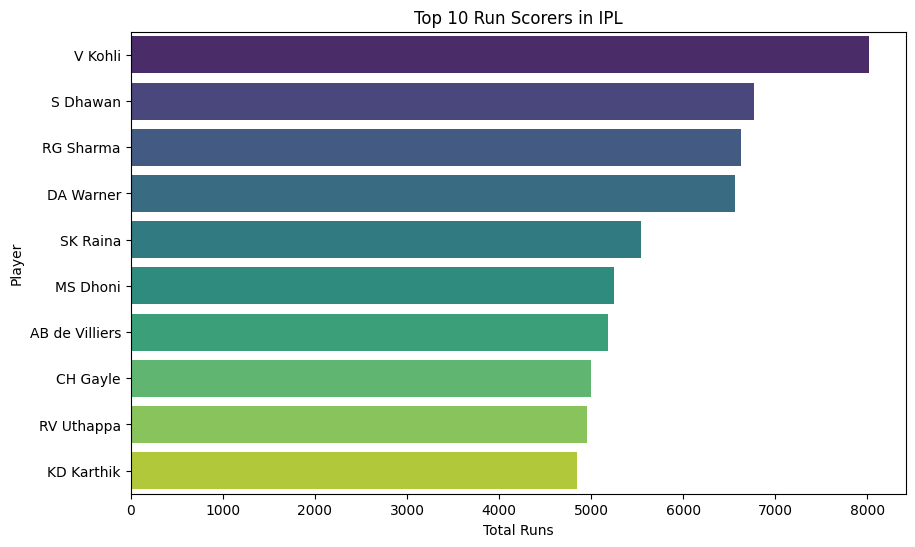

In [12]:
# =============================
# 1. Top Run Scorers
# =============================
top_runs = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_runs.values, y=top_runs.index, hue=top_runs.index, palette="viridis", legend=False)
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.show()

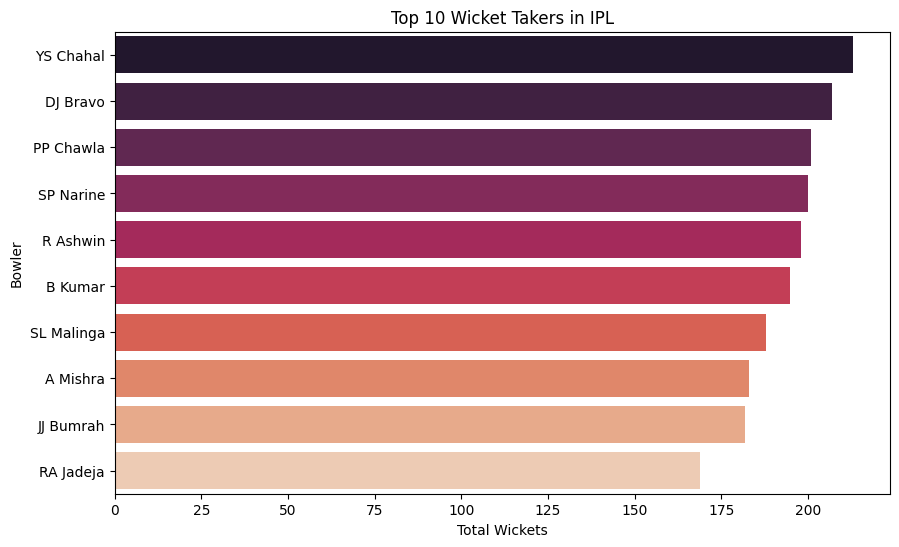

In [13]:
# =============================
# 2. Top Wicket Takers
# =============================
top_wickets = deliveries.groupby("bowler")["is_wicket"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_wickets.values, y=top_wickets.index, hue=top_wickets.index, palette="rocket", legend=False)
plt.title("Top 10 Wicket Takers in IPL")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.show()

 Teams winning after winning toss: 51.98%


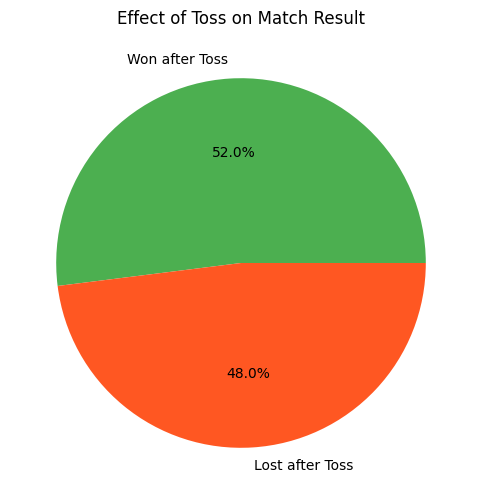

In [15]:
# =============================
# 3. Toss Effect on Winning Probability
# =============================
toss_wins = matches[matches["toss_winner"] == matches["winner"]].shape[0]
total_matches = matches.shape[0]
toss_win_percent = round((toss_wins / total_matches) * 100, 2)

print(f" Teams winning after winning toss: {toss_win_percent}%")

# Pie chart for toss effect
labels = ["Won after Toss", "Lost after Toss"]
sizes = [toss_wins, total_matches - toss_wins]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["#4CAF50","#FF5722"])
plt.title("Effect of Toss on Match Result")
plt.show()

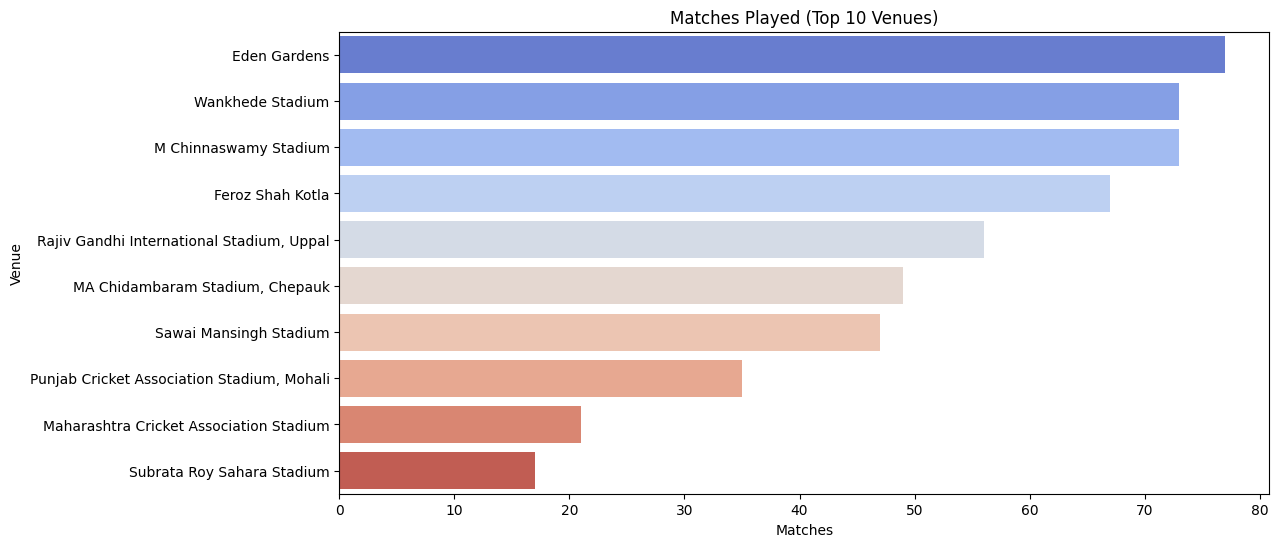

In [16]:
# =============================
# 4. Venue-wise Winning Distribution
# =============================
venue_wins = matches["venue"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=venue_wins.values, y=venue_wins.index, hue=venue_wins.index, palette="coolwarm", legend=False)
plt.title("Matches Played (Top 10 Venues)")
plt.xlabel("Matches")
plt.ylabel("Venue")
plt.show()

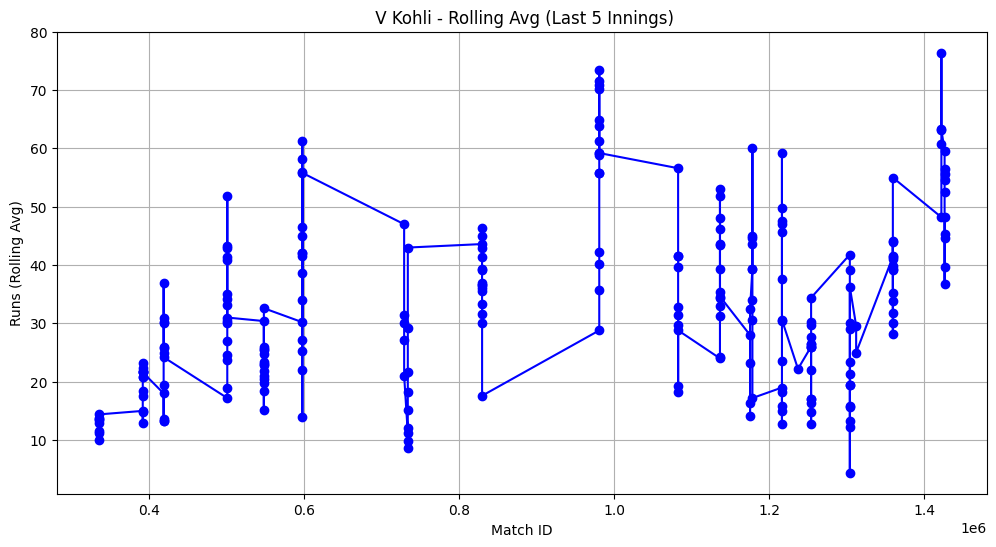

In [11]:
# =============================
# 5. Player Form Analysis (Rolling Average)
# =============================
player_name = "V Kohli"  # Change to any player
player_data = deliveries[deliveries["batter"] == player_name].groupby("match_id")["batsman_runs"].sum().reset_index()
player_data["rolling_avg"] = player_data["batsman_runs"].rolling(window=5).mean()

plt.figure(figsize=(12,6))
plt.plot(player_data["match_id"], player_data["rolling_avg"], marker="o", color="blue")
plt.title(f" {player_name} - Rolling Avg (Last 5 Innings)")
plt.xlabel("Match ID")
plt.ylabel("Runs (Rolling Avg)")
plt.grid(True)
plt.show()